In [35]:
import pandas as pd
import numpy as np


p0 = pd.read_csv('prices_round_2_day_-1.csv', sep=';')
p1 = pd.read_csv('prices_round_2_day_0.csv', sep=';')
p2 = pd.read_csv('p2.csv', sep=';')

t0 = pd.read_csv('trades_round_2_day_-1_nn.csv', sep=';')
t1 = pd.read_csv('trades_round_2_day_0_nn.csv', sep=';')
t2 = pd.read_csv('trades_round_2_day_1_nn.csv', sep=';')

In [3]:
p2 = pd.read_csv('.csv',sep=';')


/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_56898/2437456908.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['fair_price'] = coco_fair_price
/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_56898/2437456908.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pina['fair_price'] = pina_fair_price


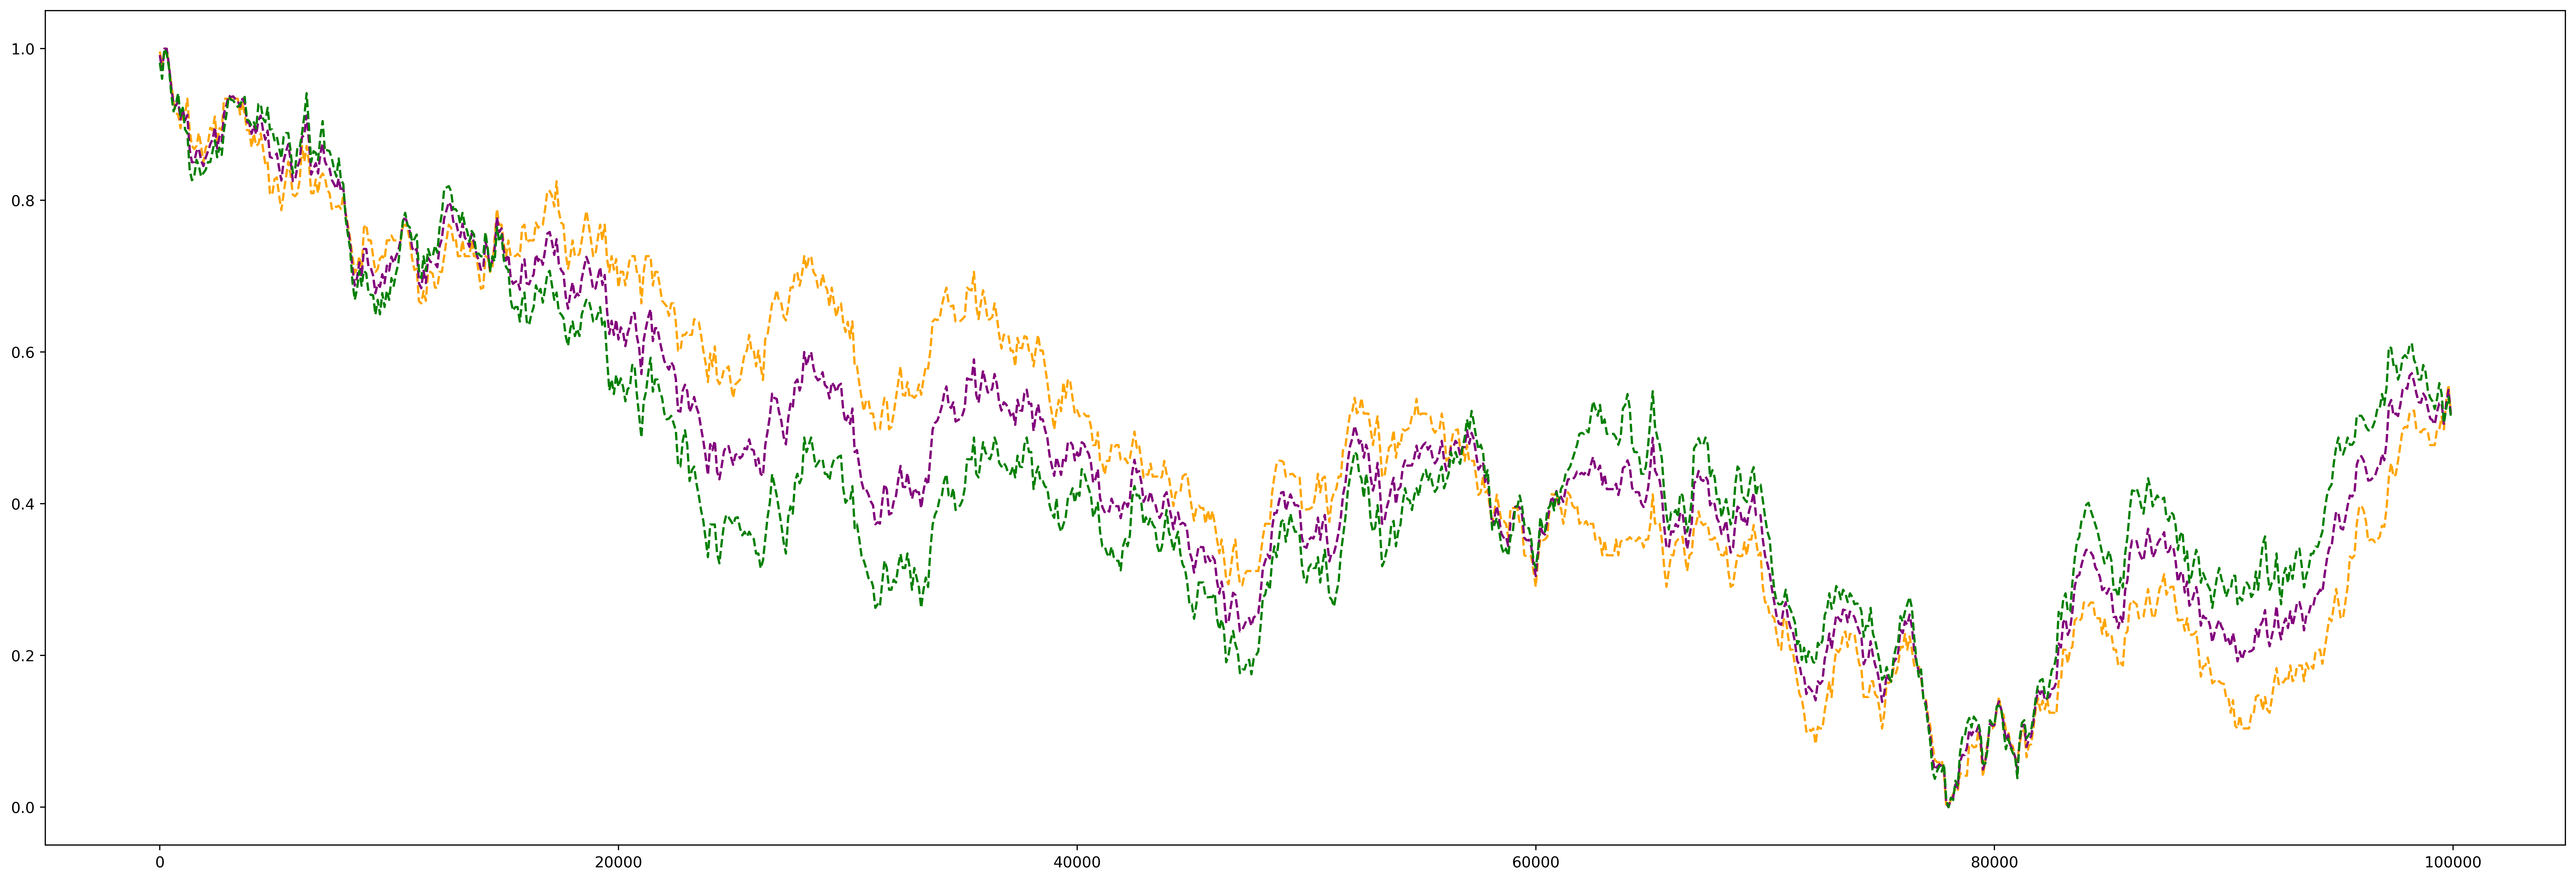

In [38]:
p2_pina = p2[p2['product'] == 'PINA_COLADAS']
p2_coco = p2[p2['product'] == 'COCONUTS']
p2_r2 = pd.concat([p2_coco, p2_pina])
p2_r2 = p2_r2.fillna(0)
p2_r2['wmid'] = (p2_r2.bid_price_1 * p2_r2.bid_volume_1 +  
                 p2_r2.bid_price_2 * p2_r2.bid_volume_2 +  
                 p2_r2.bid_price_3 * p2_r2.bid_volume_3 +
                 p2_r2.ask_price_1 * p2_r2.ask_volume_1 +
                 p2_r2.ask_price_2 * p2_r2.ask_volume_2 + 
                 p2_r2.ask_price_3 * p2_r2.ask_volume_3) / (p2_r2.bid_volume_1 + 
                                                            p2_r2.bid_volume_2 + 
                                                            p2_r2.bid_volume_3 + 
                                                            p2_r2.ask_volume_1 +
                                                            p2_r2.ask_volume_2 +
                                                            p2_r2.ask_volume_3)

coco = p2_r2[p2_r2['product'] == 'COCONUTS']
pina = p2_r2[p2_r2['product'] == 'PINA_COLADAS']
coco_wmid = coco['wmid'].values[0] if not coco.empty else None
pina_wmid = pina['wmid'].values[0] if not pina.empty else None
p2_r2_pivot = p2_r2.pivot_table(index='timestamp', columns='product', values='wmid')
coco_fair_price = (pina.wmid.values * 8/15 + coco.wmid.values)/2
pina_fair_price = (pina.wmid.values + coco.wmid.values * 15/8)/2
coco['fair_price'] = coco_fair_price
pina['fair_price'] = pina_fair_price
p2_r2_pivot = p2_r2_pivot.reset_index().merge(coco[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_coco'))
p2_r2_pivot = p2_r2_pivot.reset_index().merge(pina[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_pina'))
p2_r2_pivot.rename(columns={'fair_price': 'fair_price_coco', 'wmid': 'wmid_coco', 'fair_price_pina': 'fair_price_pina', 'wmid_pina': 'wmid_pina'}, inplace=True)
p2_r2_pivot['coco_edge'] =  p2_r2_pivot['fair_price_coco'] - p2_r2_pivot.wmid_coco
p2_r2_pivot['pina_edge'] =  p2_r2_pivot['fair_price_pina'] - p2_r2_pivot.wmid_pina


p2_r2_pivot['wmid_diff'] = p2_r2_pivot['PINA_COLADAS'] - p2_r2_pivot['COCONUTS'] - 7000
# p2_r2_pivot['wmid_diff_mean'] = p2_r2_pivot['wmid_diff'].rolling(50).mean()
p2_r2_pivot['wmid_diff_10'] = p2_r2_pivot['wmid_diff'].rolling(10).mean().diff()
p2_r2_pivot['wmid_diff_50'] = p2_r2_pivot['wmid_diff'].diff().rolling(50).mean()


p2_r2_pivot['wmid_diff_std_10'] = p2_r2_pivot['wmid_diff'].rolling(25).std()
p2_r2_pivot['wmid_diff_std_20'] = p2_r2_pivot['wmid_diff'].rolling(15).std()
p2_r2_pivot['wmid_diff_normalized'] = (p2_r2_pivot['wmid_diff'] - p2_r2_pivot['wmid_diff'].min()) / (p2_r2_pivot['wmid_diff'].max() - p2_r2_pivot['wmid_diff'].min())
p2_r2_pivot['fair_price_normalized'] = (p2_r2_pivot['fair_price_coco'] - p2_r2_pivot['fair_price_coco'].min()) / (p2_r2_pivot['fair_price_coco'].max() - p2_r2_pivot['fair_price_coco'].min())
p2_r2_pivot['wmid_coco_normalized'] = (p2_r2_pivot['wmid_coco'] - p2_r2_pivot['wmid_coco'].min()) / (p2_r2_pivot['wmid_coco'].max() - p2_r2_pivot['wmid_coco'].min())
p2_r2_pivot['fair_price_pina_normalized'] = (p2_r2_pivot['fair_price_pina'] - p2_r2_pivot['fair_price_pina'].min()) / (p2_r2_pivot['fair_price_pina'].max() - p2_r2_pivot['fair_price_pina'].min())
p2_r2_pivot['wmid_pina_normalized'] = (p2_r2_pivot['wmid_pina'] - p2_r2_pivot['wmid_pina'].min()) / (p2_r2_pivot['wmid_pina'].max() - p2_r2_pivot['wmid_pina'].min())
                                                                                                                                                                 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30, 10), dpi=500)
# plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['coco_edge'], label='WMID Difference', color='blue')
# plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['pina_edge'], label='WMID Difference', color='blue')
plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['fair_price_normalized'], label='Coco Fair Price', linestyle='--', color='red')
plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['wmid_coco_normalized'], label='Coco wmid', linestyle='--', color='orange')
plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['fair_price_pina_normalized'], label='Pina Fair Price', linestyle='--', color='purple')
plt.plot(p2_r2_pivot['timestamp'], p2_r2_pivot['wmid_pina_normalized'], label='Pina wmid', linestyle='--', color='green')

# import matplotlib.pyplot as plt
# plt.figure(figsize=(30, 10), dpi=500)
# plt.plot(p2_r2_pivot.index, p2_r2_pivot['wmid_diff'], label='WMID Difference', color='blue')
# plt.plot(coco.index, coco['fair_price'], label='Coco Fair Price', linestyle='--')
# plt.plot(coco.index, coco['wmid'], label='Coco wmid', linestyle='--')
# # plt.plot(p2_r2_pivot.index, p2_r2_pivot['wmid_diff_50'], label='WMID Difference', color='yellow')
# plt.xlabel('Timestamp')
# plt.ylabel('WMID Difference')
# plt.title('WMID Difference between COCONUTS and PINA_COLADAS by Timestamp')

# # Find the points with two conditions: wmid_diff_std_10 >= 4 and wmid_diff_10 < 0
# high_std_points_1 = p2_r2_pivot[(p2_r2_pivot['wmid_diff_std_10'] >= p2_r2_pivot['wmid_diff_std_10'].mean()) & (p2_r2_pivot['wmid_diff_10'] < 0)]
# high_std_points_2 = p2_r2_pivot[(p2_r2_pivot['wmid_diff_std_10'] >= p2_r2_pivot['wmid_diff_std_10'].mean()) & (book1_r2_pivot['wmid_diff_10'] > 0)]
# plt.scatter(high_std_points_1['timestamp'], high_std_points_1['wmid_diff_normalized'], color='green', label='Std >= 4 and Diff < 0')
# plt.scatter(high_std_points_2['timestamp'], high_std_points_2['wmid_diff_normalized'], color='red', label='Std >= 4 and Diff > 0')



# day 0: 
# bid_1 mean diff: -7011.24, ask_1 mean diff: -7011.43
# bid_2 mean diff: -7011.76, ask_2 mean diff: -7013.70
# bid_3 mean diff: -7015.92, ask_3 mean diff: -7025.95
# mid_price diff: -7011.336

# objective: find optimal mean_diff to capture arbritrage opportunities
# objective: balancing inventory optimally
# objective: study well pricing around bid ask, including arb opp ocurrs, what is bid ask price movements?

/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_56898/1938974276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['fair_price'] = coco_fair_price
/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_56898/1938974276.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pina['fair_price'] = pina_fair_price


Text(0.5, 1.0, 'Coco and Pina Fair Prices')

<Figure size 15000x5000 with 0 Axes>

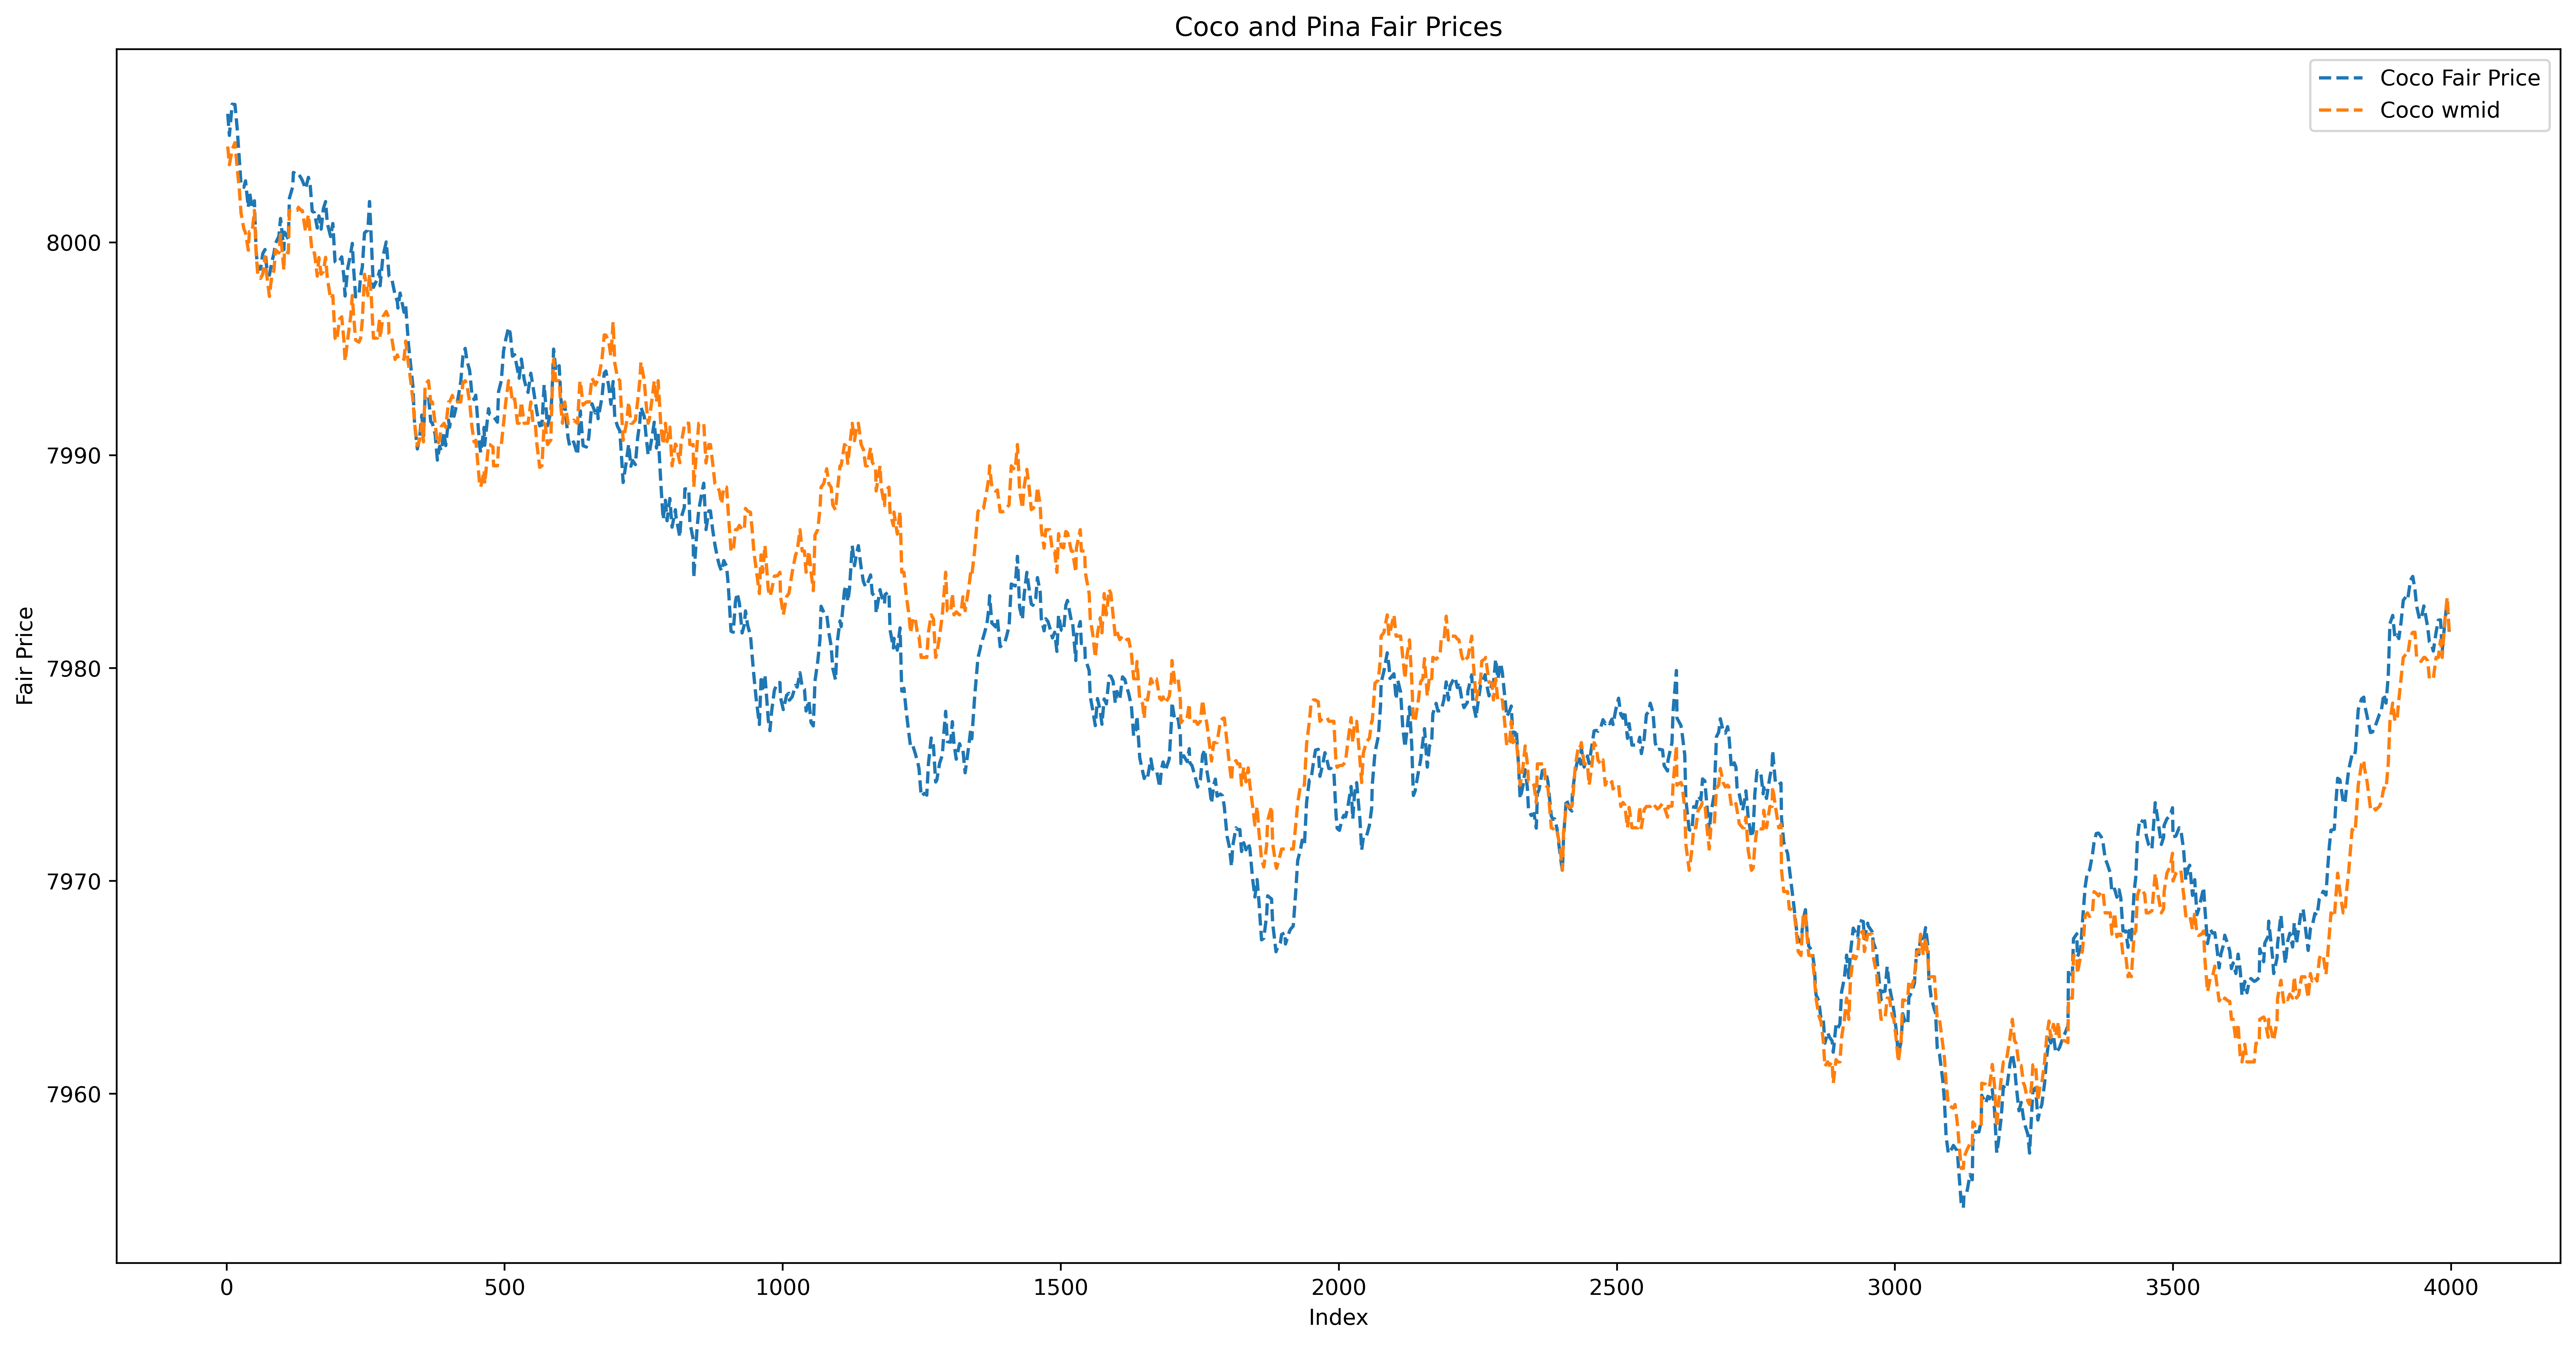

In [5]:
plt.figure(figsize=(30, 10), dpi=500)
coco_fair_price = (pina.wmid.values * 8/15 + coco.wmid.values)/2
pina_fair_price = (pina.wmid.values + coco.wmid.values * 15/8)/2

# Add new columns to dataframes
coco['fair_price'] = coco_fair_price
pina['fair_price'] = pina_fair_price

# Plot fair prices
fig, ax = plt.subplots(figsize=(20, 10), dpi=500)
plt.plot(coco.index, coco['fair_price'], label='Coco Fair Price', linestyle='--')
plt.plot(coco.index, coco['wmid'], label='Coco wmid', linestyle='--')
# plt.plot(pina.index, pina['fair_price'], label='Pina Fair Price', linestyle='--')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Fair Price')
plt.legend()
plt.title('Coco and Pina Fair Prices')

In [222]:
coco_fair_price = pd.Series((pina.wmid.values * 8/15 + coco.wmid.values) / 2)
pc_fair_price = pd.Series((pina.wmid.values + coco.wmid.values * 15/8) / 2)


0      8006.037879
1      8005.023333
2      8006.486119
3      8006.474107
4      8005.350000
          ...     
995    7982.263520
996    7980.783333
997    7982.230993
998    7983.164469
999    7981.550000
Length: 1000, dtype: float64

In [209]:
coco_fair_price = (coco.wmid + pina.wmid) * 8/15 / 2
coco_fair_price

0      NaN
2      NaN
5      NaN
6      NaN
10     NaN
        ..
3991   NaN
3992   NaN
3993   NaN
3997   NaN
3999   NaN
Name: wmid, Length: 2000, dtype: float64

In [191]:
# p2_pina = p2[p2['product'] == 'PINA_COLADAS']
# p2_coco = p2[p2['product'] == 'COCONUTS']
# p2_r2 = pd.concat([p2_coco, p2_pina])
# p2_r2 = p2_r2.fillna(0)
# p2_r2['wmid'] = (p2_r2.bid_price_1 * p2_r2.bid_volume_1 +  
#                  p2_r2.bid_price_2 * p2_r2.bid_volume_2 +  
#                  p2_r2.bid_price_3 * p2_r2.bid_volume_3 +
#                  p2_r2.ask_price_1 * p2_r2.ask_volume_1 +
#                  p2_r2.ask_price_2 * p2_r2.ask_volume_2 + 
#                  p2_r2.ask_price_3 * p2_r2.ask_volume_3) / (p2_r2.bid_volume_1 + 
#                                                             p2_r2.bid_volume_2 + 
#                                                             p2_r2.bid_volume_3 + 
#                                                             p2_r2.ask_volume_1 +
#                                                             p2_r2.ask_volume_2 +
#                                                             p2_r2.ask_volume_3)

# coco = p2_r2[p2_r2['product'] == 'COCONUTS']
# pina = p2_r2[p2_r2['product'] == 'PINA_COLADAS']
# coco_wmid = coco['wmid'].values[0] if not coco.empty else None
# pina_wmid = pina['wmid'].values[0] if not pina.empty else None

# p2_r2_pivot = p2_r2.pivot_table(index='timestamp', columns='product', values='wmid')
# p2_r2_pivot['wmid_diff'] = p2_r2_pivot['PINA_COLADAS'] - p2_r2_pivot['COCONUTS'] - 7000
# p2_r2_pivot['wmid_diff_10'] = p2_r2_pivot['wmid_diff'].rolling(50).mean().diff()
# p2_r2_pivot['wmid_diff_std_10'] = p2_r2_pivot['wmid_diff'].rolling(20).std()
# print(p2_r2_pivot['wmid_diff_std_10'].mean())
# p2_r2_pivot['wmid_diff_std_20'] = p2_r2_pivot['wmid_diff'].rolling(5).std()
# p2_r2_pivot.dropna(subset=['wmid_diff'], inplace=True)
# # print(f'mean: {p2_r2_pivot.wmid_diff.mean()}, std:{p2_r2_pivot.wmid_diff.std()}')
# import matplotlib.pyplot as plt
# # fig, ax = plt.subplots(figsize=(20, 10), dpi=500)


# plt.figure(figsize=(30, 10), dpi=500)
# plt.plot(p2_r2_pivot.index, p2_r2_pivot['wmid_diff'], label='WMID Difference', color='blue')
# # plt.plot(p1_r2_pivot.index, p1_r2_pivot['wmid_diff_50'], label='WMID Difference', color='yellow')
# plt.xlabel('Timestamp')
# plt.ylabel('WMID Difference')
# plt.title('WMID Difference between COCONUTS and PINA_COLADAS by Timestamp')

# # Find the points with two conditions: wmid_diff_std_10 >= 4 and wmid_diff_10 < 0
# high_std_points_1 = p2_r2_pivot[(p2_r2_pivot['wmid_diff_std_10'] >= p2_r2_pivot['wmid_diff_std_10'].median()+1) & (p2_r2_pivot['wmid_diff_10'] < p2_r2_pivot['wmid_diff_10'].mean())]
# high_std_points_2 = p2_r2_pivot[(p2_r2_pivot['wmid_diff_std_10'] >= p2_r2_pivot['wmid_diff_std_10'].median()+1) & (p2_r2_pivot['wmid_diff_10'] > p2_r2_pivot['wmid_diff_10'].mean())]
# # high_std_points_3 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_10'] >= p1_r2_pivot['wmid_diff_10'].mean())]
# # high_std_points_4 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_std_10'] >= 4) & (p1_r2_pivot['wmid_diff_50'] > 0)]
# # # Add the scatter plot with these points
# plt.scatter(high_std_points_1.index, high_std_points_1['wmid_diff'], color='green', label='Std >= 4 and Diff < 0')
# plt.scatter(high_std_points_2.index, high_std_points_2['wmid_diff'], color='red', label='Std >= 4 and Diff > 0')
# plt.legend()

# # Show the plot
# plt.show()


coco = p2_r2[p2_r2['product'] == 'COCONUTS']
pina = book1_r2[book1_r2['product'] == 'PINA_COLADAS']
coco_wmid = coco['wmid'].values[0] if not coco.empty else None
pina_wmid = pina['wmid'].values[0] if not pina.empty else None
book1_r2_pivot = book1_r2.pivot_table(index='timestamp', columns='product', values='wmid')
coco_fair_price = (pina.wmid.values * 8/15 + coco.wmid.values)/2
pina_fair_price = (pina.wmid.values + coco.wmid.values * 15/8)/2
coco['fair_price'] = coco_fair_price
pina['fair_price'] = pina_fair_price
book1_r2_pivot = book1_r2_pivot.reset_index().merge(coco[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_coco'))
book1_r2_pivot = book1_r2_pivot.reset_index().merge(pina[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_pina'))
book1_r2_pivot['coco_edge'] =  book1_r2_pivot['fair_price_coco'] - book1_r2_pivot.wmid_coco
book1_r2_pivot['pina_edge'] =  book1_r2_pivot['fair_price_pina'] - book1_r2_pivot.wmid_pina

2.7855856241584696


In [150]:
p0_pina = p0[p0['product'] == 'PINA_COLADAS']
p0_coco = p0[p0['product'] == 'COCONUTS']
p0_r2 = pd.concat([p0_coco, p0_pina])
p0_r2 = p0_r2.fillna(0)
p0_r2['wmid'] = (p0_r2.bid_price_1 * p0_r2.bid_volume_1 +  
                 p0_r2.bid_price_2 * p0_r2.bid_volume_2 +  
                 p0_r2.bid_price_3 * p0_r2.bid_volume_3 +
                 p0_r2.ask_price_1 * p0_r2.ask_volume_1 +
                 p0_r2.ask_price_2 * p0_r2.ask_volume_2 + 
                 p0_r2.ask_price_3 * p0_r2.ask_volume_3) / (p0_r2.bid_volume_1 + 
                                                            p0_r2.bid_volume_2 + 
                                                            p0_r2.bid_volume_3 + 
                                                            p0_r2.ask_volume_1 +
                                                            p0_r2.ask_volume_2 +
                                                            p0_r2.ask_volume_3)

coco = p0_r2[p0_r2['product'] == 'COCONUTS']
pina = p0_r2[p0_r2['product'] == 'PINA_COLADAS']
coco_wmid = coco['wmid'].values[0] if not coco.empty else None
pina_wmid = pina['wmid'].values[0] if not pina.empty else None

p0_r2_pivot = p0_r2.pivot_table(index='timestamp', columns='product', values='wmid')
p0_r2_pivot['wmid_diff'] = p0_r2_pivot['PINA_COLADAS'] - p0_r2_pivot['COCONUTS'] - 7000
p0_r2_pivot['wmid_diff_mean'] = p0_r2_pivot['wmid_diff'].rolling(100).mean()
p0_r2_pivot['wmid_diff_10'] = p0_r2_pivot['wmid_diff'].rolling(100).mean().diff()
p0_r2_pivot['wmid_diff_std_10'] = p0_r2_pivot['wmid_diff'].rolling(10).std()
p0_r2_pivot['wmid_diff_std_20'] = p0_r2_pivot['wmid_diff'].rolling(5).std()
p0_r2_pivot.dropna(subset=['wmid_diff'], inplace=True)
print(f'mean: {p0_r2_pivot.wmid_diff.mean()}, std:{p0_r2_pivot.wmid_diff.std()}')
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10), dpi=500)


plt.figure(figsize=(30, 10), dpi=500)
plt.plot(p0_r2_pivot.index, p0_r2_pivot['wmid_diff'], label='WMID Difference', color='blue')
# plt.plot(p1_r2_pivot.index, p1_r2_pivot['wmid_diff_50'], label='WMID Difference', color='yellow')
plt.xlabel('Timestamp')
plt.ylabel('WMID Difference')
plt.title('WMID Difference between COCONUTS and PINA_COLADAS by Timestamp')

# Find the points with two conditions: wmid_diff_std_10 >= 4 and wmid_diff_10 < 0
high_std_points_2 = p0_r2_pivot[(p0_r2_pivot['wmid_diff'] < (p0_r2_pivot['wmid_diff_mean'] + 10 * p0_r2_pivot['wmid_diff_std_10']))]
high_std_points_2 = p0_r2_pivot[(p0_r2_pivot['wmid_diff'] >= (p0_r2_pivot['wmid_diff_mean'] + 10 * p0_r2_pivot['wmid_diff_std_10']))]
# high_std_points_3 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_10'] >= p1_r2_pivot['wmid_diff_10'].mean())]
# high_std_points_4 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_std_10'] >= 4) & (p1_r2_pivot['wmid_diff_50'] > 0)]
# # Add the scatter plot with these points
plt.scatter(high_std_points_1.index, high_std_points_1['wmid_diff'], color='green', label='Std >= 4 and Diff < 0')
plt.scatter(high_std_points_2.index, high_std_points_2['wmid_diff'], color='red', label='Std >= 4 and Diff > 0')
plt.legend()

# Show the plot
plt.show()

mean: 11.33601068668854, std:45.911839895868496


In [18]:
pina['ma'] = pina.mid_price.rolling(5).mean()
pina['mid_diff'] = pina.mid_price.diff()
pina['ma_diff'] = pina.mid_diff.rolling(20).mean()
pina['ma_diff_ew5'] = pina.mid_diff.ewm(span = 5, adjust = False,).mean()
pina['ma_diff_ew10'] = pina.mid_diff.ewm(span = 20, adjust = False,).mean()
pina['pred1'] = pina.wmid + pina.ma_diff_ew10
pina['pred2'] = pina.wmid + pina.ma_diff_ew5
pina['pred3'] = pina.wmid + pina.ma_diff
pina['spread1'] = pina.ask_price_1 - pina.bid_price_1
pina['spread2'] = pina.ask_price_2 - pina.bid_price_2
pina['spread3'] = pina.ask_price_3 - pina.bid_price_3
coco['ma'] = coco.mid_price.rolling(5).mean()
coco['mid_diff'] = coco.mid_price.diff()
coco['ma_diff'] = coco.mid_diff.rolling(20).mean()
coco['ma_diff_ew5'] = coco.mid_diff.ewm(span = 5, adjust = False,).mean()
coco['ma_diff_ew10'] = coco.mid_diff.ewm(span = 20, adjust = False,).mean()
coco['pred1'] = coco.wmid + coco.ma_diff_ew10
coco['pred2'] = coco.wmid + coco.ma_diff_ew5
coco['pred3'] = coco.wmid + coco.ma_diff
coco['spread1'] = coco.ask_price_1 - coco.bid_price_1
coco['spread2'] = coco.ask_price_2 - coco.bid_price_2
coco['spread3'] = coco.ask_price_3 - coco.bid_price_3


/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_28646/4111895748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pina['ma'] = pina.mid_price.rolling(5).mean()
/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_28646/4111895748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pina['mid_diff'] = pina.mid_price.diff()
/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_28646/4111895748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [19]:
# coco['mid0'] = coco['wmid'] 
coco['mid1'] = coco['wmid'] 

/var/folders/bb/g8c6d14n37lb8f846cg2t1_m0000gn/T/ipykernel_28646/338709643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coco['mid1'] = coco['wmid']


In [20]:
coco = coco[200:250]

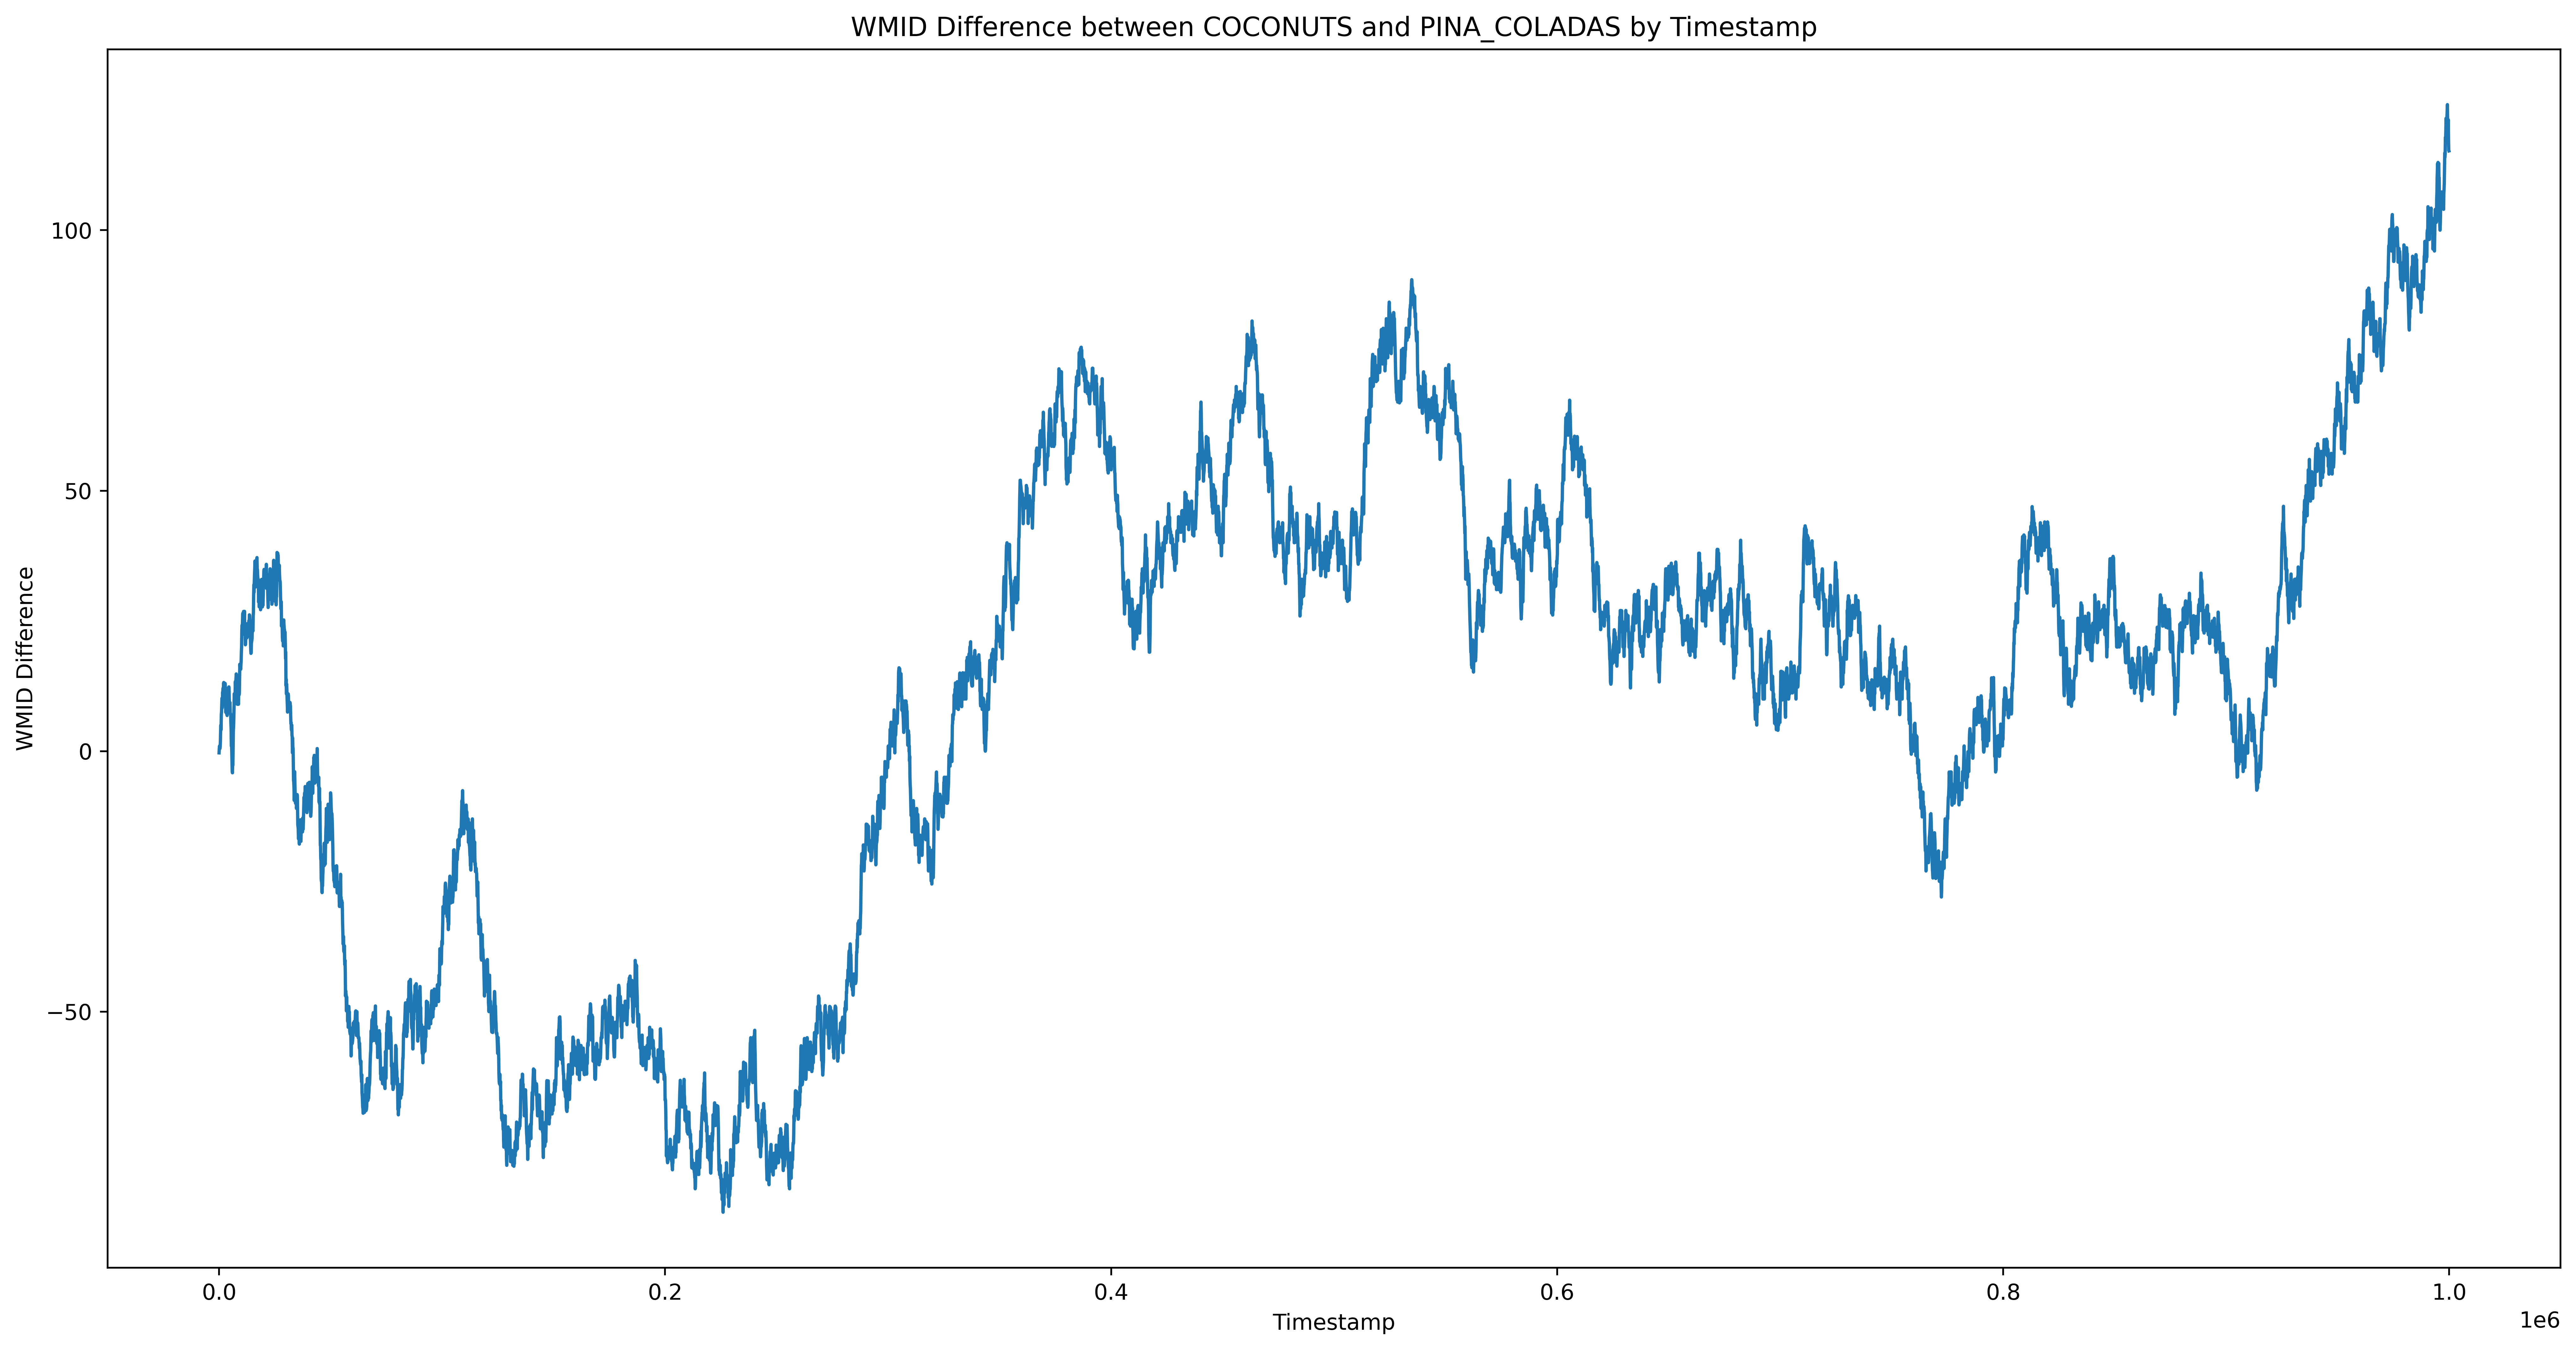

In [25]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10), dpi=500)

plt.figure(figsize=(20, 10), dpi=500)
plt.plot(p0_r2_pivot.index, p0_r2_pivot['wmid_diff'])
plt.xlabel('Timestamp')
plt.ylabel('WMID Difference')
plt.title('WMID Difference between COCONUTS and PINA_COLADAS by Timestamp')
plt.show()
# coco.plot(x='timestamp', y=['bid_price_1', 'ask_price_1', 'mid_price'], ax=ax)
# ax.plot(coco['timestamp'], coco['pred_mid3'], color='red')
# ax.plot(coco['timestamp'], coco.mid_price, color='green')
# ax.plot(coco['timestamp'], coco['pred3'], color='blue')
# ax.plot(coco['timestamp'], coco['pred2'], color='red')

# ax.plot(coco['timestamp'], coco['bid_price_1'], marker='o', markersize=2, color='blue', linestyle='None')
# ax.plot(coco['timestamp'], coco['ask_price_1'], marker='o', markersize=2, color='green', linestyle='None')

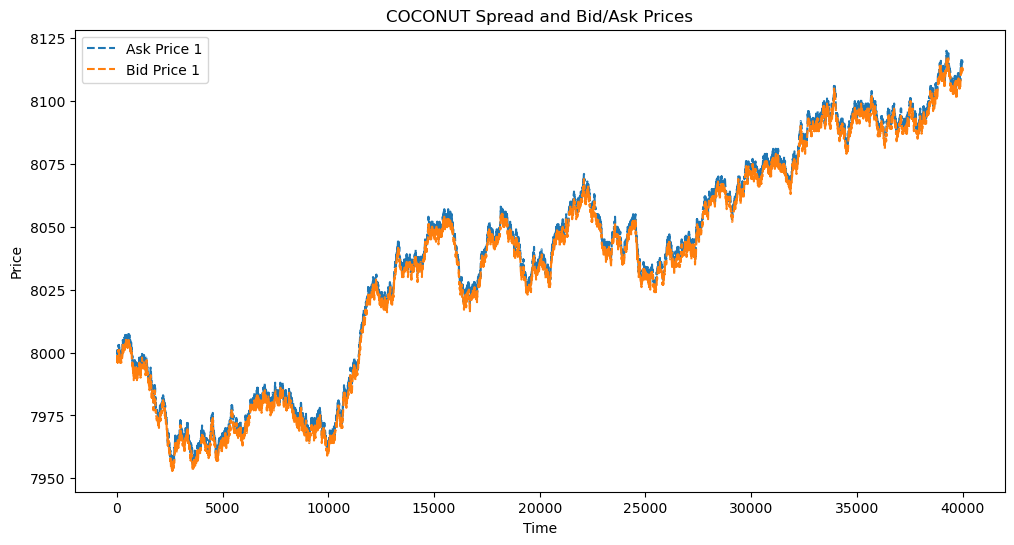

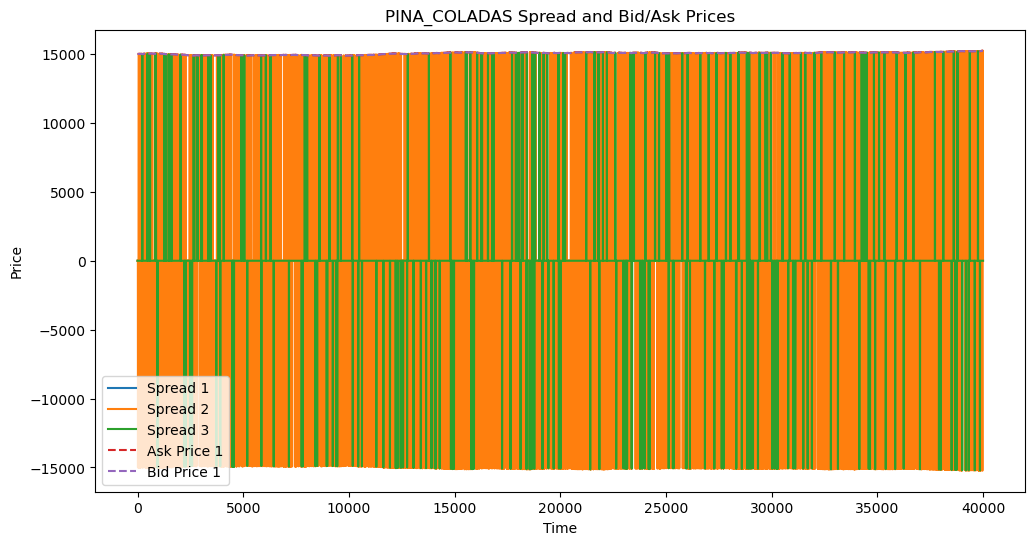

In [11]:
import matplotlib.pyplot as plt

# Plot COCONUT spread
plt.figure(figsize=(12, 6))
# plt.plot(coco['spread1'], label='Spread 1')
# plt.plot(coco['spread2'], label='Spread 2')
# plt.plot(coco['spread3'], label='Spread 3')
plt.plot(coco['ask_price_1'], label='Ask Price 1', linestyle='--')
plt.plot(coco['bid_price_1'], label='Bid Price 1', linestyle='--')
plt.title('COCONUT Spread and Bid/Ask Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot PINA_COLADAS spread
plt.figure(figsize=(12, 6))
plt.plot(pina['spread1'], label='Spread 1')
plt.plot(pina['spread2'], label='Spread 2')
plt.plot(pina['spread3'], label='Spread 3')
plt.plot(pina['ask_price_1'], label='Ask Price 1', linestyle='--')
plt.plot(pina['bid_price_1'], label='Bid Price 1', linestyle='--')
plt.title('PINA_COLADAS Spread and Bid/Ask Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()




In [16]:
coco = coco[200:500]
pina = pina[200:500]

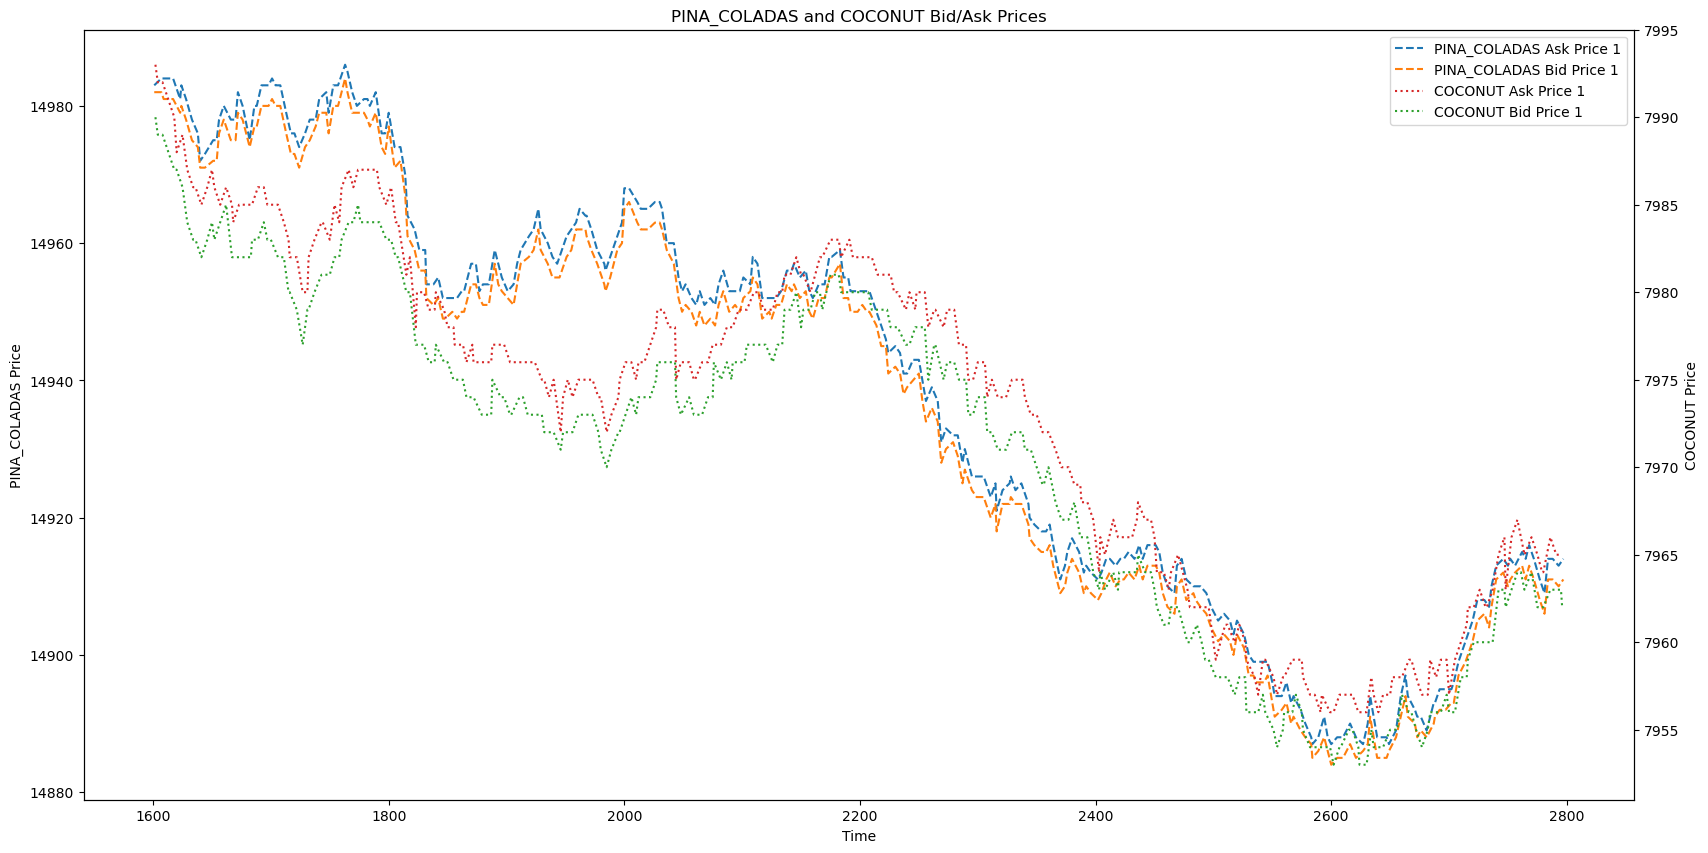

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot PINA_COLADAS bid and ask prices on the primary y-axis
ax1.plot(pina['ask_price_1'], label='PINA_COLADAS Ask Price 1', linestyle='--')
ax1.plot(pina['bid_price_1'], label='PINA_COLADAS Bid Price 1', linestyle='--')

# Set labels and colors for the primary y-axis
ax1.set_xlabel('Time')
ax1.set_ylabel('PINA_COLADAS Price')
ax1.tick_params(axis='y')

# Create a secondary y-axis for COCONUT bid and ask prices
ax2 = ax1.twinx()

# Plot COCONUT bid and ask prices on the secondary y-axis
ax2.plot(coco['ask_price_1'], label='COCONUT Ask Price 1', linestyle=':', color='C3')
ax2.plot(coco['bid_price_1'], label='COCONUT Bid Price 1', linestyle=':', color='C2')

# Set labels and colors for the secondary y-axis
ax2.set_ylabel('COCONUT Price')
ax2.tick_params(axis='y')

# Combine legends from both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title('PINA_COLADAS and COCONUT Bid/Ask Prices')
plt.show()


In [18]:
pina.spread1.mean()

2.6666666666666665

In [19]:
coco.spread1.mean()

2.453333333333333

In [133]:
book1 = pd.read_csv('Book1.csv', sep=';')
book1

day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0       1          0  PINA_COLADAS        15013            36      15012.0   
1       1          0       BANANAS         4871             3       4870.0   
2       1          0      COCONUTS         8003           214          NaN   
3       1          0        PEARLS         9998             3       9996.0   
4       1        100       BANANAS         4870            26          NaN   
...   ...        ...           ...          ...           ...          ...   
3995    1      99800       BANANAS         4879             1       4878.0   
3996    1      99900       BANANAS         4879            28          NaN   
3997    1      99900      COCONUTS         7980           174          NaN   
3998    1      99900        PEARLS         9995            28          NaN   
3999    1      99900  PINA_COLADAS        14964           101          NaN   

      bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0             52.0          NaN           NaN        15016            88   
1             22.0          NaN           NaN         4877            22   
2              NaN          NaN           NaN         8006           214   
3              1.0       9995.0          21.0        10004             1   
4              NaN          NaN           NaN         4877            26   
...            ...          ...           ...          ...           ...   
3995          25.0          NaN           NaN         4885            26   
3996           NaN          NaN           NaN         4886            28   
3997           NaN          NaN           NaN         7983           174   
3998           NaN          NaN           NaN        10005            28   
3999           NaN          NaN           NaN        14967           101   

      ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0             NaN           NaN          NaN           NaN    15014.5   
1             NaN           NaN          NaN           NaN     4874.0   
2             NaN           NaN          NaN           NaN     8004.5   
3         10005.0          21.0          NaN           NaN    10001.0   
4             NaN           NaN          NaN           NaN     4873.5   
...           ...           ...          ...           ...        ...   
3995          NaN           NaN          NaN           NaN     4882.0   
3996          NaN           NaN          NaN           NaN     4882.5   
3997          NaN           NaN          NaN           NaN     7981.5   
3998          NaN           NaN          NaN           NaN    10000.0   
3999          NaN           NaN          NaN           NaN    14965.5   

      profit_and_loss  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
3995              0.0  
3996              0.0  
3997              0.0  
3998              0.0  
3999              0.0  

[4000 rows x 17 columns]

In [ ]:
p1_pina = p1[p1['product'] == 'PINA_COLADAS']
p1_coco = p1[p1['product'] == 'COCONUTS']
p1_r2 = pd.concat([p1_coco, p1_pina])
p1_r2 = p1_r2.fillna(0)
p1_r2['wmid'] = (p1_r2.bid_price_1 * p1_r2.bid_volume_1 +  
                 p1_r2.bid_price_2 * p1_r2.bid_volume_2 +  
                 p1_r2.bid_price_3 * p1_r2.bid_volume_3 +
                 p1_r2.ask_price_1 * p1_r2.ask_volume_1 +
                 p1_r2.ask_price_2 * p1_r2.ask_volume_2 + 
                 p1_r2.ask_price_3 * p1_r2.ask_volume_3) / (p1_r2.bid_volume_1 + 
                                                            p1_r2.bid_volume_2 + 
                                                            p1_r2.bid_volume_3 + 
                                                            p1_r2.ask_volume_1 +
                                                            p1_r2.ask_volume_2 +
                                                            p1_r2.ask_volume_3)

coco = p1_r2[p1_r2['product'] == 'COCONUTS']
pina = p1_r2[p1_r2['product'] == 'PINA_COLADAS']
coco_wmid = coco['wmid'].values[0] if not coco.empty else None
pina_wmid = pina['wmid'].values[0] if not pina.empty else None

p1_r2_pivot = p1_r2.pivot_table(index='timestamp', columns='product', values='wmid')
p1_r2_pivot['wmid_diff'] = p1_r2_pivot['PINA_COLADAS'] - p1_r2_pivot['COCONUTS'] - 7000
p1_r2_pivot['wmid_diff_10'] = p1_r2_pivot['wmid_diff'].rolling(100).mean().diff()
# p1_r2_pivot['wmid_diff_50'] = p1_r2_pivot['wmid_diff'].diff().rolling(50).mean()


p1_r2_pivot['wmid_diff_std_10'] = p1_r2_pivot['wmid_diff'].rolling(10).std()
# p1_r2_pivot['wmid_diff_std_10_diff'] = p1_r2_pivot['wmid_diff'].rolling(10).std().diff()
p1_r2_pivot['wmid_diff_std_20'] = p1_r2_pivot['wmid_diff'].rolling(15).std()

# p1_r2_pivot.dropna(subset=['wmid_diff'], inplace=True)
# print(f'mean: {p1_r2_pivot.wmid_diff.mean()}, std:{p1_r2_pivot.wmid_diff.std()}')
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10), dpi=500)




# # Prepare the plot
plt.figure(figsize=(30, 10), dpi=500)
plt.plot(p1_r2_pivot.index, p1_r2_pivot['wmid_diff'], label='WMID Difference', color='blue')
# plt.plot(p1_r2_pivot.index, p1_r2_pivot['wmid_diff_50'], label='WMID Difference', color='yellow')
plt.xlabel('Timestamp')
plt.ylabel('WMID Difference')
plt.title('WMID Difference between COCONUTS and PINA_COLADAS by Timestamp')

# Find the points with two conditions: wmid_diff_std_10 >= 4 and wmid_diff_10 < 0
high_std_points_1 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_std_10'] >= 4) & (p1_r2_pivot['wmid_diff_10'] < 0)]
high_std_points_2 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_std_10'] >= 4) & (p1_r2_pivot['wmid_diff_10'] > 0)]
# high_std_points_3 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_10'] >= p1_r2_pivot['wmid_diff_10'].mean())]
# high_std_points_4 = p1_r2_pivot[(p1_r2_pivot['wmid_diff_std_10'] >= 4) & (p1_r2_pivot['wmid_diff_50'] > 0)]
# # Add the scatter plot with these points
plt.scatter(high_std_points_1.index, high_std_points_1['wmid_diff'], color='green', label='Std >= 4 and Diff < 0')
plt.scatter(high_std_points_2.index, high_std_points_2['wmid_diff'], color='red', label='Std >= 4 and Diff > 0')


# day 0: 
# bid_1 mean diff: -7011.24, ask_1 mean diff: -7011.43
# bid_2 mean diff: -7011.76, ask_2 mean diff: -7013.70
# bid_3 mean diff: -7015.92, ask_3 mean diff: -7025.95
# mid_price diff: -7011.336

# objective: find optimal mean_diff to capture arbritrage opportunities
# objective: balancing inventory optimally
# objective: study well pricing around bid ask, including arb opp ocurrs, what is bid ask price movements?

In [ ]:
coco = p2_r2[p2_r2['product'] == 'COCONUTS']
pina = book1_r2[book1_r2['product'] == 'PINA_COLADAS']
coco_wmid = coco['wmid'].values[0] if not coco.empty else None
pina_wmid = pina['wmid'].values[0] if not pina.empty else None
book1_r2_pivot = book1_r2.pivot_table(index='timestamp', columns='product', values='wmid')
coco_fair_price = (pina.wmid.values * 8/15 + coco.wmid.values)/2
pina_fair_price = (pina.wmid.values + coco.wmid.values * 15/8)/2
coco['fair_price'] = coco_fair_price
pina['fair_price'] = pina_fair_price
book1_r2_pivot = book1_r2_pivot.reset_index().merge(coco[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_coco'))
book1_r2_pivot = book1_r2_pivot.reset_index().merge(pina[['timestamp', 'fair_price', 'wmid']], how='left', on='timestamp', suffixes=('', '_pina'))
book1_r2_pivot['coco_edge'] =  book1_r2_pivot['fair_price_coco'] - book1_r2_pivot.wmid_coco
book1_r2_pivot['pina_edge'] =  book1_r2_pivot['fair_price_pina'] - book1_r2_pivot.wmid_pina